<a href="https://colab.research.google.com/github/nuwan94/SENG-42293-Big-Data-Analytics/blob/main/SE2015003_Nuwan_Alawatta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Student ID: SE2015003
# Student Name: Nuwan Alawatta

Let's import the exercise dataset using `pandas` library.

We can use `head()` function in the pandas to print out first few rows.

In [2]:
import pandas as pd
exercise_data = pd.read_csv('exercise.csv')
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
5,15130815,female,36,151,50,23,96,40.7,123
6,19602372,female,33,158,56,22,95,40.5,112
7,11117088,male,41,175,85,25,100,40.7,143
8,12132339,male,60,186,94,21,97,40.4,134
9,17964668,female,26,146,51,16,90,40.2,72


## Task 1

Let's analyze gatherd `exercise_data` for get an idea about the pre-processing requirments.

Using `dtypes` is pandas data frame object we can get idea about **data types** of each column.

In [3]:
exercise_data.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

Above resutls shows only **Gender** column has non-numeric values.

After checking the data types we can check wheter there is `NULL` values in any column using following code.

In [4]:
exercise_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Since results is `0` for **all the columns** we can confirm there are no missing values in an column (Including **Gender** colum)

Let's find further about the coulmns column using `describe()` and `value_counts` function to get idea about the value types contain.

In [5]:
exercise_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [6]:
exercise_data['Age'].describe()

count    15000.000000
mean        42.789800
std         16.980264
min         20.000000
25%         28.000000
50%         39.000000
75%         56.000000
max         79.000000
Name: Age, dtype: float64

In [7]:
exercise_data['Height'].describe()

count    15000.000000
mean       174.465133
std         14.258114
min        123.000000
25%        164.000000
50%        175.000000
75%        185.000000
max        222.000000
Name: Height, dtype: float64

In [8]:
exercise_data['Weight'].describe()

count    15000.000000
mean        74.966867
std         15.035657
min         36.000000
25%         63.000000
50%         74.000000
75%         87.000000
max        132.000000
Name: Weight, dtype: float64

In [9]:
exercise_data['Duration'].describe()

count    15000.000000
mean        15.530600
std          8.319203
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: Duration, dtype: float64

In [10]:
exercise_data['Heart_Rate'].describe()

count    15000.000000
mean        95.518533
std          9.583328
min         67.000000
25%         88.000000
50%         96.000000
75%        103.000000
max        128.000000
Name: Heart_Rate, dtype: float64

In [11]:
exercise_data['Body_Temp'].describe()

count    15000.000000
mean        40.025453
std          0.779230
min         37.100000
25%         39.600000
50%         40.200000
75%         40.600000
max         41.500000
Name: Body_Temp, dtype: float64

In [12]:
exercise_data['Calories'].describe()

count    15000.000000
mean        89.539533
std         62.456978
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        314.000000
Name: Calories, dtype: float64

As next step we can find the correlation between the data. For clearly have a idea about these correlation, lets use `matplotlib` library for draw graphs.
Using the `%matplotlib inline` option we can show the graph on notebook it self next to the particular code.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

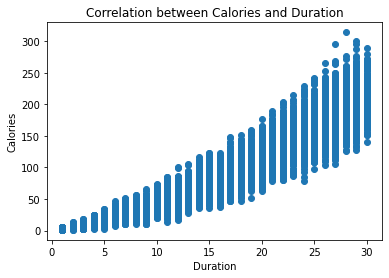

In [14]:
x = exercise_data['Duration']
y = exercise_data['Calories']

plt.title('Correlation between Calories and Duration')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.scatter(x, y)

The above graphs confirms correlation between `Calories` and `Duration` is not perfectly non-linear and slightly curved.



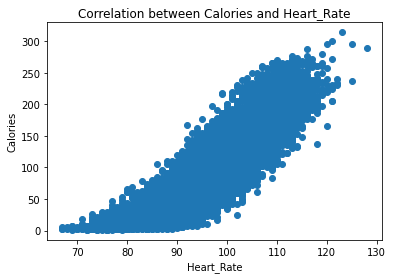

In [15]:
x = exercise_data['Heart_Rate']
y = exercise_data['Calories']

plt.title('Correlation between Calories and Heart_Rate')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories')
plt.scatter(x, y)

The above graphs confirms correlation between `Calories` and `Heart_Rate` is not perfectly non-linear and slightly curved.

Next we can check the `Caleories` for possibiltiy of negative prediction due to it's current distribution. For that we can use `seaborn` (Python visualization library based on `matplotlib`) to draw a **Histogram** of the Calories values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


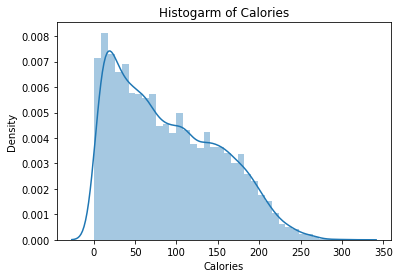

In [16]:
import seaborn as sns

plt.title('Histogarm of Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
sns.distplot(exercise_data['Calories'])

The above histoprgram suggest the current distibution contain **non-positive values**.


#### Conclusions

* There are no **NaN** values in this dataset.
* The Gender column need to convert to a **measurable** entity.
* There is a non-linear correlation between `Calories` vs. `Heart_Rate` and  `Calories` vs. `Duration`
* The `Calories` value may leads to predict negative.

## Task 2

In this section lets fix dataset and add new features to overcome the problems.

#### Make them measuarable

In above we found that `Gender` is not measurable, to fix that we can assign numerical column for that. Since there is only `male` and `female` options, we can apply `1` for `male` and `0` for `female`.

In [17]:
exercise_data = exercise_data.assign(Numeric_Gender = (exercise_data[ 'Gender' ] == 'male').astype(int))
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Numeric_Gender
0,14733363,male,68,190,94,29,105,40.8,231,1
1,14861698,female,20,166,60,14,94,40.3,66,0
2,11179863,male,69,179,79,5,88,38.7,26,1
3,16180408,female,34,179,71,13,100,40.5,71,0
4,17771927,female,27,154,58,10,81,39.8,35,0
5,15130815,female,36,151,50,23,96,40.7,123,0
6,19602372,female,33,158,56,22,95,40.5,112,0
7,11117088,male,41,175,85,25,100,40.7,143,1
8,12132339,male,60,186,94,21,97,40.4,134,1
9,17964668,female,26,146,51,16,90,40.2,72,0


In [18]:
exercise_data['Numeric_Gender'].value_counts()

0    7553
1    7447
Name: Numeric_Gender, dtype: int64

#### Lower Non-Linearity

Using squared values make the **non-linerarity lower**. In python `**2` use to square the values.

In [19]:
exercise_data['Squared_Duration'] = exercise_data['Duration'] ** 2
exercise_data['Squared_Heart_Rate'] = exercise_data['Heart_Rate'] ** 2
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Numeric_Gender,Squared_Duration,Squared_Heart_Rate
0,14733363,male,68,190,94,29,105,40.8,231,1,841,11025
1,14861698,female,20,166,60,14,94,40.3,66,0,196,8836
2,11179863,male,69,179,79,5,88,38.7,26,1,25,7744
3,16180408,female,34,179,71,13,100,40.5,71,0,169,10000
4,17771927,female,27,154,58,10,81,39.8,35,0,100,6561
5,15130815,female,36,151,50,23,96,40.7,123,0,529,9216
6,19602372,female,33,158,56,22,95,40.5,112,0,484,9025
7,11117088,male,41,175,85,25,100,40.7,143,1,625,10000
8,12132339,male,60,186,94,21,97,40.4,134,1,441,9409
9,17964668,female,26,146,51,16,90,40.2,72,0,256,8100


Let's check how squared values helps to make linearrity in the distributions.

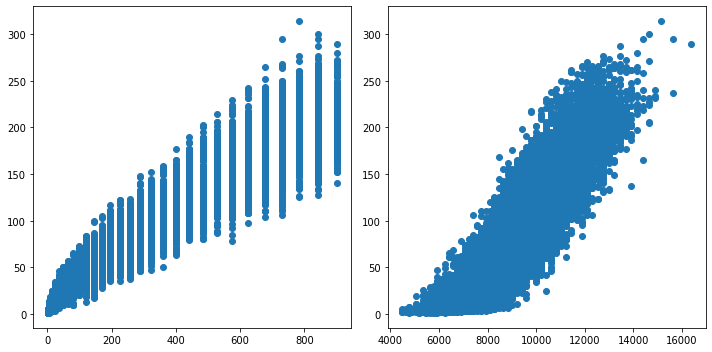

In [20]:
x1 = exercise_data['Squared_Duration']
x2 = exercise_data['Squared_Heart_Rate']
y = exercise_data['Calories']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(x1, y)
axes[1].scatter(x2, y)
fig.tight_layout()

#### Apply Mathematical Functions

The `Calories` had distibution that may results non-negative prediction, to fix this we can use `log` value of the Calories. For this concern and any other **large-scale mathematical operation** apply scenarios we use `numpy` library.**bold text**

In [21]:
import numpy as np

exercise_data['Log_Calories'] = np.log(exercise_data['Calories'])
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Numeric_Gender,Squared_Duration,Squared_Heart_Rate,Log_Calories
0,14733363,male,68,190,94,29,105,40.8,231,1,841,11025,5.442418
1,14861698,female,20,166,60,14,94,40.3,66,0,196,8836,4.189655
2,11179863,male,69,179,79,5,88,38.7,26,1,25,7744,3.258097
3,16180408,female,34,179,71,13,100,40.5,71,0,169,10000,4.262680
4,17771927,female,27,154,58,10,81,39.8,35,0,100,6561,3.555348
5,15130815,female,36,151,50,23,96,40.7,123,0,529,9216,4.812184
6,19602372,female,33,158,56,22,95,40.5,112,0,484,9025,4.718499
7,11117088,male,41,175,85,25,100,40.7,143,1,625,10000,4.962845
8,12132339,male,60,186,94,21,97,40.4,134,1,441,9409,4.897840
9,17964668,female,26,146,51,16,90,40.2,72,0,256,8100,4.276666


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


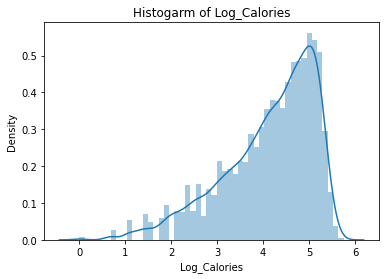

In [22]:
plt.title('Histogarm of Log_Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
sns.distplot(exercise_data['Log_Calories'])

#### Scaling Distributions

For the normal distribution we can apply **ZSocre** method to scale the values.


In [23]:
from scipy.stats import zscore

exercise_data['ZScore_Body_Temp'] = zscore(exercise_data['Body_Temp'])
exercise_data['ZScore_Height'] = zscore(exercise_data['Height'])
exercise_data['ZScore_Weight'] = zscore(exercise_data['Weight'])
exercise_data['ZScore_Squared_Heart_Rate'] = zscore(exercise_data['Squared_Heart_Rate'])

exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Numeric_Gender,Squared_Duration,Squared_Heart_Rate,Log_Calories,ZScore_Body_Temp,ZScore_Height,ZScore_Weight,ZScore_Squared_Heart_Rate
0,14733363,male,68,190,94,29,105,40.8,231,1,841,11025,5.442418,0.994023,1.089582,1.265909,0.987193
1,14861698,female,20,166,60,14,94,40.3,66,0,196,8836,4.189655,0.352342,-0.593726,-0.995458,-0.207123
2,11179863,male,69,179,79,5,88,38.7,26,1,25,7744,3.258097,-1.701035,0.318066,0.268247,-0.802917
3,16180408,female,34,179,71,13,100,40.5,71,0,169,10000,4.262680,0.609015,0.318066,-0.263839,0.427955
4,17771927,female,27,154,58,10,81,39.8,35,0,100,6561,3.555348,-0.289338,-1.435380,-1.128480,-1.448360
5,15130815,female,36,151,50,23,96,40.7,123,0,529,9216,4.812184,0.865687,-1.645794,-1.660566,0.000205
6,19602372,female,33,158,56,22,95,40.5,112,0,484,9025,4.718499,0.609015,-1.154829,-1.261501,-0.104004
7,11117088,male,41,175,85,25,100,40.7,143,1,625,10000,4.962845,0.865687,0.037514,0.667312,0.427955
8,12132339,male,60,186,94,21,97,40.4,134,1,441,9409,4.897840,0.480679,0.809031,1.265909,0.105506
9,17964668,female,26,146,51,16,90,40.2,72,0,256,8100,4.276666,0.224006,-1.996483,-1.594055,-0.608683


For non-normal distributions like, `Age` and `Duration` let's us **MinMax** method to scale the values.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minMaxData = pd.DataFrame(scaler.fit_transform(exercise_data.loc[:, ['Age', 'Squared_Duration']]), columns=['Min_Max_Age', 'Min_Max_Squared_Duration'])
exercise_data = pd.concat([exercise_data, minMaxData], axis = 1, join = 'inner')

exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Numeric_Gender,Squared_Duration,Squared_Heart_Rate,Log_Calories,ZScore_Body_Temp,ZScore_Height,ZScore_Weight,ZScore_Squared_Heart_Rate,Min_Max_Age,Min_Max_Squared_Duration
0,14733363,male,68,190,94,29,105,40.8,231,1,841,11025,5.442418,0.994023,1.089582,1.265909,0.987193,0.813559,0.934372
1,14861698,female,20,166,60,14,94,40.3,66,0,196,8836,4.189655,0.352342,-0.593726,-0.995458,-0.207123,0.000000,0.216908
2,11179863,male,69,179,79,5,88,38.7,26,1,25,7744,3.258097,-1.701035,0.318066,0.268247,-0.802917,0.830508,0.026696
3,16180408,female,34,179,71,13,100,40.5,71,0,169,10000,4.262680,0.609015,0.318066,-0.263839,0.427955,0.237288,0.186874
4,17771927,female,27,154,58,10,81,39.8,35,0,100,6561,3.555348,-0.289338,-1.435380,-1.128480,-1.448360,0.118644,0.110122
5,15130815,female,36,151,50,23,96,40.7,123,0,529,9216,4.812184,0.865687,-1.645794,-1.660566,0.000205,0.271186,0.587319
6,19602372,female,33,158,56,22,95,40.5,112,0,484,9025,4.718499,0.609015,-1.154829,-1.261501,-0.104004,0.220339,0.537264
7,11117088,male,41,175,85,25,100,40.7,143,1,625,10000,4.962845,0.865687,0.037514,0.667312,0.427955,0.355932,0.694105
8,12132339,male,60,186,94,21,97,40.4,134,1,441,9409,4.897840,0.480679,0.809031,1.265909,0.105506,0.677966,0.489433
9,17964668,female,26,146,51,16,90,40.2,72,0,256,8100,4.276666,0.224006,-1.996483,-1.594055,-0.608683,0.101695,0.283648


## Task 3

Final step of preparing this dataset is removing non-used columns and make sure dataset contains all the necessary feature columns and label column.

Following can be identified as columns need to delete from the dataset.

* User_ID
* Gender
* Age
* Height
* Weight
* Duration
* Heart_Rate
* Body_Temp
* Calories
* Squared_Duration
* Squared_Heart_Rate

Also we can rename the columns to it's original names for future usability.

In [25]:
column_to_remove = ['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories', 'Squared_Duration', 'Squared_Heart_Rate']
exercise_data.drop(column_to_remove, axis = 1, inplace = True)

In [26]:
exercise_data = exercise_data.reindex(columns=['Numeric_Gender', 'Min_Max_Age',	'ZScore_Height', 'ZScore_Weight', 
                                               'Min_Max_Squared_Duration', 'ZScore_Squared_Heart_Rate', 
                                               'ZScore_Body_Temp', 'Log_Calories'])
rename_columns = {'Numeric_Gender':'Gender', 'Min_Max_Age': 'Age',	
                  'ZScore_Height': 'Height', 'ZScore_Weight': 'Weight', 
                  'Min_Max_Squared_Duration': 'Duration', 'ZScore_Squared_Heart_Rate': 'Heart_Rate', 
                  'ZScore_Body_Temp': 'Body_Temp', 'Log_Calories': 'Calories'}
exercise_data.rename(columns = rename_columns, inplace = True)

exercise_data.head(10)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,0.813559,1.089582,1.265909,0.934372,0.987193,0.994023,5.442418
1,0,0.000000,-0.593726,-0.995458,0.216908,-0.207123,0.352342,4.189655
2,1,0.830508,0.318066,0.268247,0.026696,-0.802917,-1.701035,3.258097
3,0,0.237288,0.318066,-0.263839,0.186874,0.427955,0.609015,4.262680
4,0,0.118644,-1.435380,-1.128480,0.110122,-1.448360,-0.289338,3.555348
5,0,0.271186,-1.645794,-1.660566,0.587319,0.000205,0.865687,4.812184
6,0,0.220339,-1.154829,-1.261501,0.537264,-0.104004,0.609015,4.718499
7,1,0.355932,0.037514,0.667312,0.694105,0.427955,0.865687,4.962845
8,1,0.677966,0.809031,1.265909,0.489433,0.105506,0.480679,4.897840
9,0,0.101695,-1.996483,-1.594055,0.283648,-0.608683,0.224006,4.276666


Exericse dataset is now ready to training using any ML algorithm. 🥳🎉